In [7]:
!pip install imageio
!pip install pyffmpeg


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 4.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imageio.v2 as imageio
import glob
from tqdm import tqdm, trange

In [2]:
from pyffmpeg import FFmpeg

# Load in CSV and sanity check inputs

In [3]:
csv = pd.read_csv("manga/manga_7443_12703_path_props.csv")

(268.0, 752.0, 145.5, 464.5)

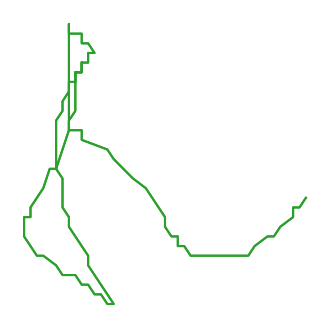

In [4]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
im = imageio.imread("manga/manga_7443_12703_reconstructed_gri.png")
# ax.imshow((im - im.min())/(im.max() - im.min()))
ax.plot(csv["x"]*10, csv["y"]*10, "C2")
ax.plot(csv["x"]*10, csv["y"]*10, "C2")
ax.axis("off")

# Make GIF

In [5]:
im = imageio.imread("manga/manga_7443_12703_reconstructed_gri.png")

for ii in tqdm(np.arange(0, len(csv["x"]), 1)):
    f, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.imshow((im - im.min())/(im.max() - im.min()))
    ax.plot(csv["x"][:ii]*10, csv["y"][:ii]*10, "r")
    ax.axis("off")
    f.savefig(f"images/galaxy_{ii:03d}.png")
    plt.close()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139/139 [00:06<00:00, 21.07it/s]


In [6]:
td = np.array(csv["timedelta"])
tds = td[:] - td[::-1]

In [7]:
images = []
for filename in tqdm(sorted(glob.glob("images/*.png"))):
    images.append(imageio.imread(filename))
imageio.mimwrite('images/galaxy.gif', images[:], loop=0, duration=[0.1]*(csv["timedelta"].values.size-1))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 333/333 [00:03<00:00, 85.95it/s]


IndexError: list index out of range

<img src="images/galaxy.gif" width="750" align="center">

In [8]:
!/home/msmith04/.pyffmpeg/bin/ffmpeg -i "images/galaxy.gif" -codec copy "images/galaxy.mp4"

ffmpeg version N-67181-g984d0b6e6f-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libfribidi --enable-libass --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg
  libavutil      58. 25.100 / 58. 25.100
  libavcodec     60. 27.100 / 60. 27.100
  libavformat    60. 13.100 / 60. 13.100
  libavdevice    60.  2.101 /

<img src="images/galaxy.mp4" width="750" align="center">

In [14]:
ffmpeg_exe = ff.get_ffmpeg_bin()

2024-04-25 15:27:42,549 - pyffmpeg.FFmpeg - INFO - Inside get_ffmpeg_bin


In [15]:
ffmpeg_exe

'/home/msmith04/.pyffmpeg/bin/ffmpeg'

In [15]:
csv

,time,x,y,stellar_vel,stellar_sigma,emline_ha,emline_hb,emline_oiii4960,emline_oiii5008
0,17:42:36.270843,73,35,0.0,0.0,0.0,0.0,0.0,0.0
1,17:42:36.283464,73,35,0.0,0.0,0.0,0.0,0.0,0.0
2,17:42:36.292020,73,35,0.0,0.0,0.0,0.0,0.0,0.0
3,17:42:36.295006,73,35,0.0,0.0,0.0,0.0,0.0,0.0
4,17:42:36.324903,72,35,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
172,17:42:38.721107,2,35,0.0,0.0,0.0,0.0,0.0,0.0
173,17:42:38.726396,2,35,0.0,0.0,0.0,0.0,0.0,0.0
174,17:42:38.743432,1,35,0.0,0.0,0.0,0.0,0.0,0.0
175,17:42:38.759384,0,35,0.0,0.0,0.0,0.0,0.0,0.0


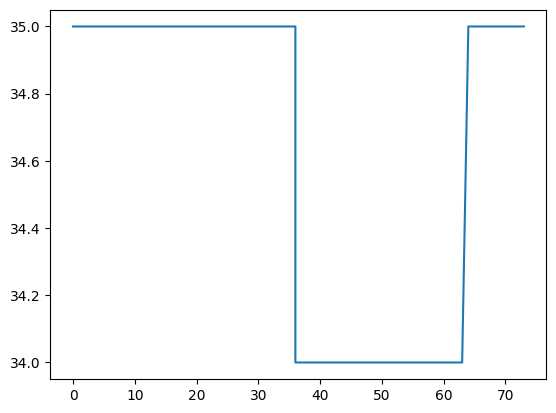

In [24]:
plt.plot(csv['x'], csv['y'])